In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

import context
from ccn import Constraint, ConstraintsGroup, Clause, ClausesGroup
from shapes import HalfPlane, Circle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Define the shapes

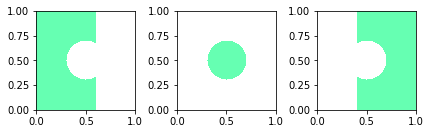

n1 :- 2
n1 :- 0
1 :- n0 n2
[<ccn.constraints_group.ConstraintsGroup object at 0x7f98a1c1cb50>, <ccn.constraints_group.ConstraintsGroup object at 0x7f98a1c55750>]
n0 :- 1
n2 :- 1
2 :- n0 n1


In [2]:
h1 = HalfPlane(1, 0, -0.6)
h2 = HalfPlane(-1, 0, 0.4) 
circle = Circle(0.5, 0.5, 0.20)
shapes = [h1 & -circle, circle, h2 & -circle]

fig, ax = plt.subplots(1, len(shapes))
fig.tight_layout()
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = ClausesGroup([Clause('n0 n1'), Clause('n1 n2'), Clause('0 1 2')]).stratify('katz')
constraints2 = ClausesGroup([Clause('n0 n1'), Clause('n1 n2'), Clause('0 1 2')]).stratify('rev-katz')

print(constraints1)
print(constraints1[0])

print(constraints2)
print(constraints2[0])
print(constraints2[1])

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 6),
            nn.Tanh(),
            nn.Linear(6, 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): Tanh()
    (2): Linear(in_features=6, out_features=3, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.680466 [    0/ 1000]
Test Error: 
 Accuracy: 45.0%, 86.0%, 51.0%
 Avg loss: 0.012951 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.645748 [    0/ 1000]
Test Error: 
 Accuracy: 45.0%, 86.0%, 51.0%
 Avg loss: 0.012179 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.604334 [    0/ 1000]
Test Error: 
 Accuracy: 71.0%, 86.0%, 61.0%
 Avg loss: 0.010924 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.540750 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 86.0%, 78.0%
 Avg loss: 0.009403 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.461010 [    0/ 1000]
Test Error: 
 Accuracy: 82.0%, 86.0%, 81.0%
 Avg loss: 0.007960 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 1 modules (at

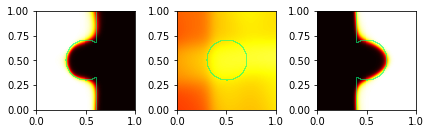

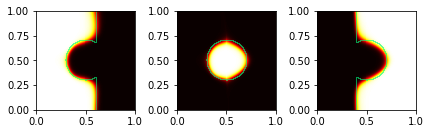

In [5]:
experiment = Experiment('midcircle', NeuralNetwork(), shapes, constraints1)
experiment.run(1000, device='cpu')
# experiment.save(dir='./models/')

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 2 modules (atoms {0, 1, 2})
loss: 0.801421 [    0/ 1000]
Test Error: 
 Accuracy: 45.0%, 90.0%, 47.0%
 Avg loss: 0.012596 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 2 modules (atoms {0, 1, 2})
loss: 0.660047 [    0/ 1000]
Test Error: 
 Accuracy: 51.0%, 90.0%, 47.0%
 Avg loss: 0.011609 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 2 modules (atoms {0, 1, 2})
loss: 0.634769 [    0/ 1000]
Test Error: 
 Accuracy: 71.0%, 90.0%, 63.0%
 Avg loss: 0.010917 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 2 modules (atoms {0, 1, 2})
loss: 0.608932 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 90.0%, 85.0%
 Avg loss: 0.010063 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 2 modules (atoms {0, 1, 2})
loss: 0.572252 [    0/ 1000]
Test Error: 
 Accuracy: 88.0%, 90.0%, 88.0%
 Avg loss: 0.008997 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 2 modules (at

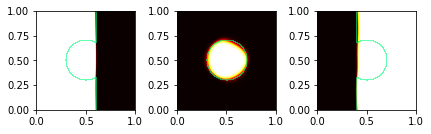

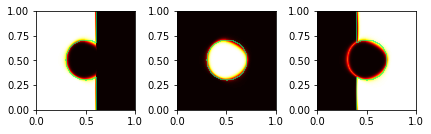

In [6]:
experiment2 = Experiment('rev-midcircle', NeuralNetwork(), shapes, constraints2)
experiment2.run(1000, device='cpu')

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1, 2})
loss: 0.759466 [    0/ 1000]
Test Error: 
 Accuracy: 45.0%, 49.0%, 83.0%
 Avg loss: 0.013263 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1, 2})
loss: 0.655732 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 85.0%, 85.0%
 Avg loss: 0.011494 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1, 2})
loss: 0.562330 [    0/ 1000]
Test Error: 
 Accuracy: 88.0%, 85.0%, 86.0%
 Avg loss: 0.010222 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1, 2})
loss: 0.501661 [    0/ 1000]
Test Error: 
 Accuracy: 91.0%, 85.0%, 86.0%
 Avg loss: 0.009174 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1, 2})
loss: 0.453322 [    0/ 1000]
Test Error: 
 Accuracy: 90.0%, 85.0%, 87.0%
 Avg loss: 0.008221 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 0 modules (at

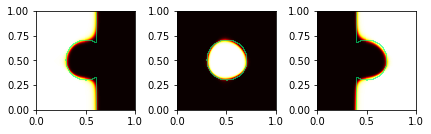

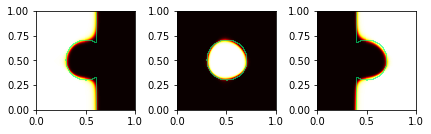

In [7]:
experiment3 = Experiment('plain', NeuralNetwork(), shapes, [])
experiment3.run(1000, device='cpu')

In [8]:
experiment.save(dir='./models/')
experiment2.save(dir='./models/')
experiment3.save(dir='./models/')